First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


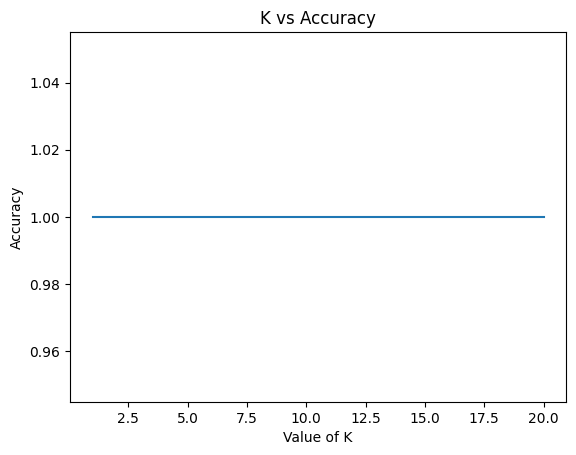

Best K: 1

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


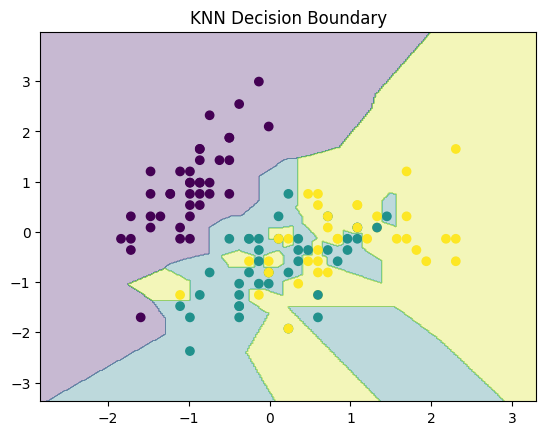

In [1]:
# Task 6: K-Nearest Neighbors (KNN) Classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset
data = load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("First 5 rows:")
print(X.head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize Features (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Try Different K Values
# -----------------------------

accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure()
plt.plot(range(1, 21), accuracies)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

# Choose Best K
best_k = accuracies.index(max(accuracies)) + 1
print("Best K:", best_k)

# Train Final Model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -----------------------------
# Decision Boundary (2 features only)
# -----------------------------

X_small = X.iloc[:, :2]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.2, random_state=42
)

X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

knn_small = KNeighborsClassifier(n_neighbors=best_k)
knn_small.fit(X_train_s, y_train_s)

# Create mesh grid
h = 0.02
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_small.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train_s)
plt.title("KNN Decision Boundary")
plt.show()